# Syllabus

Explain the pros and cons of data reduction (reduce the number of variables under consideration or simplify the models vs loss of data explainability).

# Was bedeutet Datenreduktion?

- bezeichnet den Prozess, bei dem Größe und Komplexität eines Datensatzes verringert wird, während die wesentlichen Informationen und Strukturen erhalten bleiben
- Ziel ist es, die Effizienz bei der Speicherung, Verarbeitung und Analyse der Daten zu verbessern
- Vorteile:
  - verbesserte Rechenleistung (da weniger Daten, schnellere Berechnungen + geringere Speicheranforderungen)
  - erleichterte Analyse (kleinere Datensätze einfacher zu visualisieren + interpretieren)
  - Overfitting wird vermieden (Irrelevantes oder Redundazen verschwinden)

---

# Methoden

## 1. Feature-Auswahl
   - Auswahl der relevantesten Merkmale (Features) aus einem Datensatz, um die Dimensionen zu reduzieren
   - **Beispiel**: Entfernen von Features, die wenig Einfluss auf das Ziel haben.

## 2. Feature-Extraktion
   - Erstellung neuer Features durch Kombination oder Transformation bestehender Daten.
   - **Beispiel**: Hauptkomponentenanalyse (PCA), um die Dimensionen zu reduzieren und wichtige Informationen zu bewahren

## 3. Datenkompression
   - Reduzierung der Datenmenge durch spezifische Algorithmen, die redundante Informationen eliminieren
   - **Beispiel**: Komprimierung von Bild- oder Audiodateien.

## 4. Aggregation
   - Zusammenfassung von Datenpunkten, um Informationen zu verdichten
   - **Beispiel**: Durchschnittswerte oder Summe über Gruppen von Daten berechnen.

## 5. Sampling
   - Auswahl einer repräsentativen Teilmenge aus einem größeren Datensatz
   - **Beispiel**: Ziehen einer zufälligen Stichprobe aus einer großen Umfrage.

---

# PCA
(= Principal Component Analysis)

- eine Technik zur Reduktion der Dimensionalität von Daten
- wird verwendet, um die Anzahl der Features in einem Datensatz zu verringern
- gleichzeitig aber möglichst viel der ursprünglichen Varianz der Daten erhalten 
- ist eine unüberwachte Methode, d.h. sie betrachtet nur die Eingabevariablen und keine Zielvariable
- funktioniert gut, wenn die Variablen linear voneinander abhängig sind


<br>

**Ziel der PCA:** <br>

- transformiert die Daten von einem ursprünglichen Koordinatensystem in ein neues Koordinatensystem
- in diesem sind die Daten entlang der sogenannten "Hauptkomponenten" (Principal Components) ausgerichtet
- diese Hauptkomponenten sind lineare Kombinationen der ursprünglichen Variablen und werden nach der Varianz geordnet, die sie erklären

<br>

**Schritte der PCA:** <br>

1. **Zentrieren der Daten**:
   - Subtraktion des Mittelwerts der Daten, um sie zu zentrieren
3. **Kovarianzmatrix berechnen**:
   - Kovarianzmatrix zeigt, wie stark die Variablen miteinander variieren
5. **Eigenvektoren und Eigenwerte bestimmen**:
   - Eigenvektoren geben die Richtung der Hauptkomponenten an
   - die Eigenwerte zeigen, wie viel Varianz von jeder Hauptkomponente erklärt wird
7. **Transformation**:
   - Daten werden entlang der neuen Hauptkomponenten projiziert


Beispiel in Python:

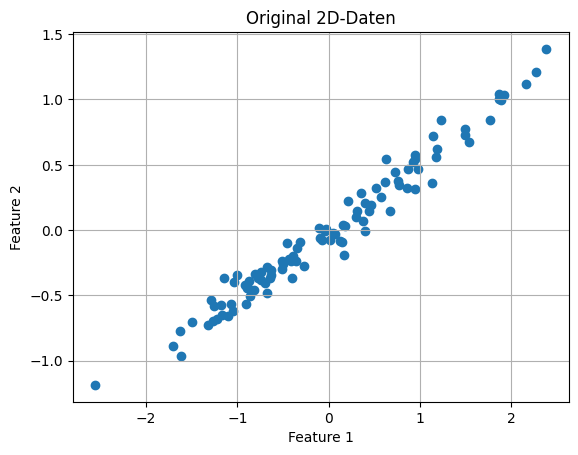

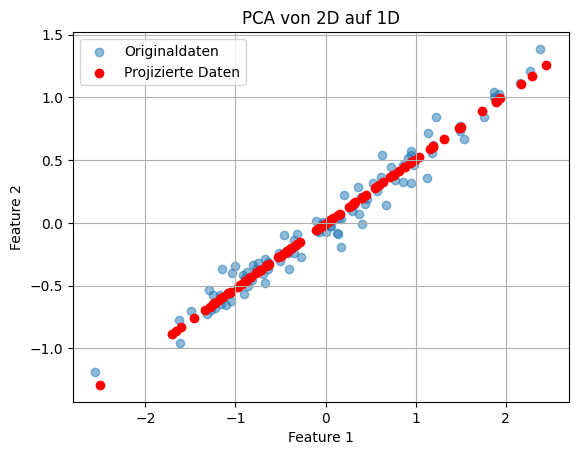

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Erstellen von 2D-Daten (zwei stark korrelierte Variablen)
np.random.seed(0)
X = np.random.randn(100, 2)
X[:, 1] = 0.5 * X[:, 0] + np.random.randn(100) * 0.1  # Korrelation hinzufügen

# Plot der Originaldaten
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original 2D-Daten")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Anwenden der PCA, um von 2D auf 1D zu reduzieren
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Inverses Transformieren, um die projizierten Punkte im 2D-Raum anzuzeigen
X_projected = pca.inverse_transform(X_pca)

# Plot der projizierten Daten auf die erste Hauptkomponente
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Originaldaten')
plt.scatter(X_projected[:, 0], X_projected[:, 1], color='red', label='Projizierte Daten')
plt.title("PCA von 2D auf 1D")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# Balance zwischen Komplexitätsreduktion und Informationsverlust



**Risiko des Informationsverlusts**
  - bei der Reduktion besteht die Gefahr, dass wichtige Muster oder Zusammenhänge verloren gehen
  - wesentliche Informationen könnten ignoriert werden, was die Modellleistung und die Fähigkeit zur Dateninterpretation beeinträchtigen kann

**Strategien zur Balance**
   - **Feature-Auswahl**:
     - sorgfältige Auswahl relevanter Merkmale, um die wichtigsten Informationen zu bewahren
   - **Feature-Extraktion**:
     - Transformation der Daten, um neue, aussagekräftige Merkmale zu schaffen, die die ursprünglichen Informationen zusammenfassen
   - **Kreuzvalidierung**:
     - Testen von Modellen mit unterschiedlichen Datensatzgrößen, um die Auswirkungen der Reduktion auf die Genauigkeit zu überwachen
   - **Domänenwissen**:
     - Einbeziehung von Fachwissen, um zu bestimmen, welche Merkmale wichtig sind und welche weggelassen werden können

---

In [ ]:
import numpy as np

np.random.seed(0)
X = np.random.randn(100, 2)
X[:, 1] = 0.5 * X[:, 0] + np.random.randn(100) * 0.1  # Hinzufügen einer linearen Beziehung

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

print(X)

print(X_pca)